In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load the engineered features
df = pd.read_csv("Datasets/engineered_laptop_features.csv")

In [3]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(columns=['price_euros'])
y = df['price_euros']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=30
)


In [4]:
# Drop rows with any NaN values in features or target
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # align with new indices

X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]


In [5]:
# Check the shapes of the test data 
X_test.shape, y_test.shape 

((367, 127), (367,))

In [6]:
# Initialize the linear regression model
model = LinearRegression()

In [7]:
print(X.isnull().sum()[X.isnull().sum() > 0])


gpu_details    67
dtype: int64


In [8]:
# Train the model
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
# Display the model's coefficient and intercept 
print(f"Model Coefficient: {model.coef_}") 
print(f"Model Intercept: {model.intercept_}") 

Model Coefficient: [ 1.73396563e-01  6.42522366e+00  2.56997859e-01  1.03491808e+01
 -3.20623903e+00  4.67425566e+01 -5.60543610e+00 -3.16191517e-13
  2.06057393e-13 -2.84217094e-13  3.26849658e-13 -6.03961325e-13
  1.19371180e-12  1.14293186e+01  3.41060513e-13 -5.68434189e-13
  2.07389120e+01  4.83169060e-13  9.73443548e-13 -7.95807864e-13
 -8.81653077e+01  3.27666540e+02  1.14085329e+03  1.03745874e+02
  5.80979211e+01  1.74821728e+03 -4.54747351e-13  1.25853081e+02
 -4.65508269e+02  9.00315545e+02  2.19351622e+03  1.18498365e+01
 -1.01084509e+02  1.13686838e-13 -1.82273007e+02 -8.31136822e+01
  1.70649115e+02  2.72747859e+02  4.09000292e+02 -5.11590770e-13
 -5.15770110e+01  3.42900402e+02  4.83516358e+01  1.10407215e+02
  1.82176801e+02 -6.82121026e-13 -1.12518254e+02  6.66523840e+02
  3.41060513e-13 -9.15081055e+01 -5.68434189e-14  2.74487712e+02
 -1.06815921e+02 -6.82121026e-13 -8.52651283e-14  6.70107818e+01
  2.12440891e+02 -1.13686838e-13  1.22350753e+03 -1.13686838e-13
 -1.39

In [10]:
# Make predictions on the training data 
y_train_pred = model.predict(X_train) 
print(f"Predicted training data: {y_train_pred[:10]}") 
print(f"\nActual training data: {(y_train[:10].values)}") 

Predicted training data: [1379.47178875 1204.79875851 1094.62171801 1046.66085005 1709.31947536
  357.34470077  724.91513301  728.26191331 1427.76834163 1105.74320373]

Actual training data: [ 779. 1017. 1070.  999. 1199.  379.  749.  825. 2499. 1388.]


In [11]:
# Make predictions on the test data 
y_pred = model.predict(X_test) 
print(f"Predicted training data: {y_pred[:10]}") 
print(f"\nActual training data: {(y_test[:10].values)}")

Predicted training data: [1530.1845724  1143.31687528  830.12755332  721.68750266  866.56841406
 1083.84201662 1211.91497433 1243.67132065 2404.86170795 2499.38473233]

Actual training data: [1875.  1268.   403.5  369.   911.  1180.  1389.  1399.  2968.  2799. ]


In [12]:
# Import metrics for evaluating model performance 
from sklearn.metrics import (r2_score,  
mean_absolute_error,  
mean_squared_error,  
root_mean_squared_error) 

In [13]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Root Mean Square Error: {rmse:.2f} euros")
print(f"R-squared Score: {r2:.3f}")

Model Performance Metrics:
Root Mean Square Error: 439.20 euros
R-squared Score: 0.639


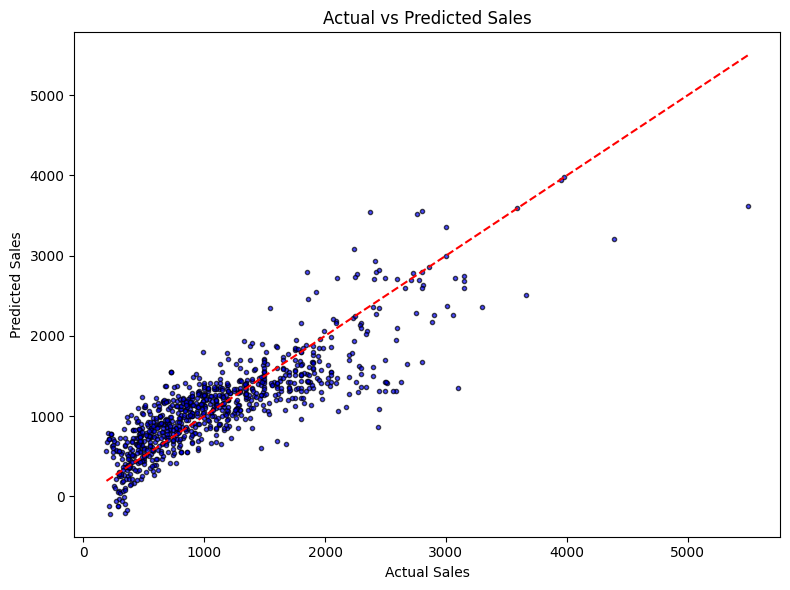

In [14]:
# Plot actual vs. predicted sales for training data 
plt.figure(figsize=(8, 6)) 
plt.scatter(y_train, y_train_pred, color='blue', edgecolor='k', alpha=0.7, 
s=9) 
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
'r--') 
plt.xlabel("Actual Sales") 
plt.ylabel("Predicted Sales") 
plt.title("Actual vs Predicted Sales") 
plt.tight_layout() 
plt.show() 

In [15]:
# Calculate evaluation metrics for the test data 
r2 = r2_score(y_test, y_pred) 
mae_val = mean_absolute_error(y_test, y_pred) 
mse_val = mean_squared_error(y_test, y_pred) 
rmse_val = np.sqrt(mse_val) 

print(f"R² Score: {r2:.3f}") 
print(f"MAE: {mae_val:.3f}") 
print(f"MSE: {mse_val:.3f}") 
print(f"RMSE: {rmse_val:.3f}") 

R² Score: 0.639
MAE: 303.009
MSE: 192895.218
RMSE: 439.198


In [16]:
# Calculate evaluation metrics for the training data 
r2_train = r2_score(y_train, y_train_pred) 
mae_train = mean_absolute_error(y_train, y_train_pred) 
mse_train = mean_squared_error(y_train, y_train_pred) 
rmse_train = np.sqrt(mse_train) 

print("Training Data Performance Metrics:")
print(f"R² Score: {r2_train:.3f}") 
print(f"MAE: {mae_train:.3f}") 
print(f"MSE: {mse_train:.3f}") 
print(f"RMSE: {rmse_train:.3f}")

Training Data Performance Metrics:
R² Score: 0.721
MAE: 274.212
MSE: 136048.439
RMSE: 368.847


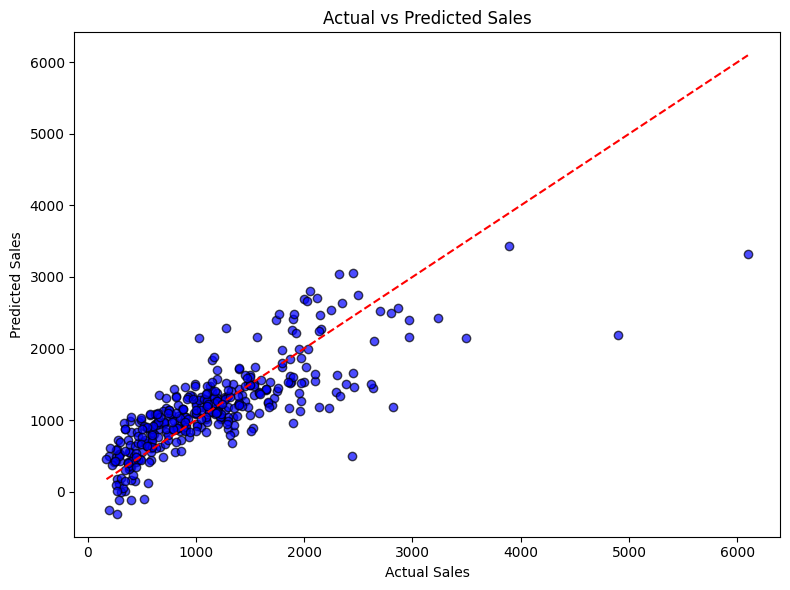

In [17]:
# Plot actual vs. predicted sales for test data 
plt.figure(figsize=(8, 6)) 
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.xlabel("Actual Sales") 
plt.ylabel("Predicted Sales") 
plt.title("Actual vs Predicted Sales") 
plt.tight_layout() 
plt.show() 

In [18]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


Top 10 Most Important Features:
            Feature  Coefficient  Abs_Coefficient
107   GPUCompany_81  2314.326086      2314.326086
119   GPUCompany_92  2295.513484      2295.513484
30    GPUCompany_11  2193.516220      2193.516220
108   GPUCompany_82  1982.810068      1982.810068
25   GPUCompany_105  1748.217281      1748.217281
86    GPUCompany_62  1747.980809      1747.980809
106   GPUCompany_80  1250.579107      1250.579107
58    GPUCompany_37  1223.507527      1223.507527
22   GPUCompany_102  1140.853295      1140.853295
111   GPUCompany_85 -1043.637442      1043.637442


# Model Evaluation

In [19]:
# Calculate evaluation metrics for the test data 
r2 = r2_score(y_test, y_pred) 
mae_val = mean_absolute_error(y_test, y_pred) 
mse_val = mean_squared_error(y_test, y_pred) 
rmse_val = np.sqrt(mse_val) 

print(f"R² Score: {r2:.3f}") 
print(f"MAE: {mae_val:.3f}") 
print(f"MSE: {mse_val:.3f}") 
print(f"RMSE: {rmse_val:.3f}") 

R² Score: 0.639
MAE: 303.009
MSE: 192895.218
RMSE: 439.198


In [25]:
# Calculate evaluation metrics for the training data 
r2_train = r2_score(y_train, y_train_pred) 
mae_train = mean_absolute_error(y_train, y_train_pred) 
mse_train = mean_squared_error(y_train, y_train_pred) 
rmse_train = np.sqrt(mse_train) 

print("Training Data Performance Metrics:")
print(f"R² Score: {r2_train:.3f}") 
print(f"MAE: {mae_train:.3f}") 
print(f"MSE: {mse_train:.3f}") 
print(f"RMSE: {rmse_train:.3f}")

Training Data Performance Metrics:
R² Score: 0.721
MAE: 274.212
MSE: 136048.439
RMSE: 368.847


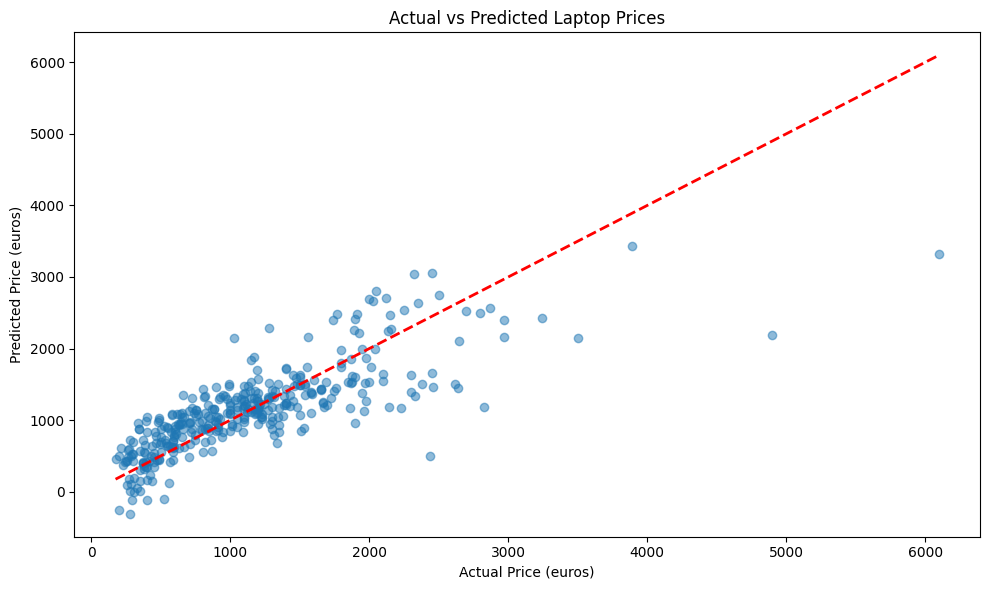

In [20]:
# Visualize Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price (euros)')
plt.ylabel('Predicted Price (euros)')
plt.title('Actual vs Predicted Laptop Prices')
plt.tight_layout()
plt.show()

In [21]:
import seaborn as sns

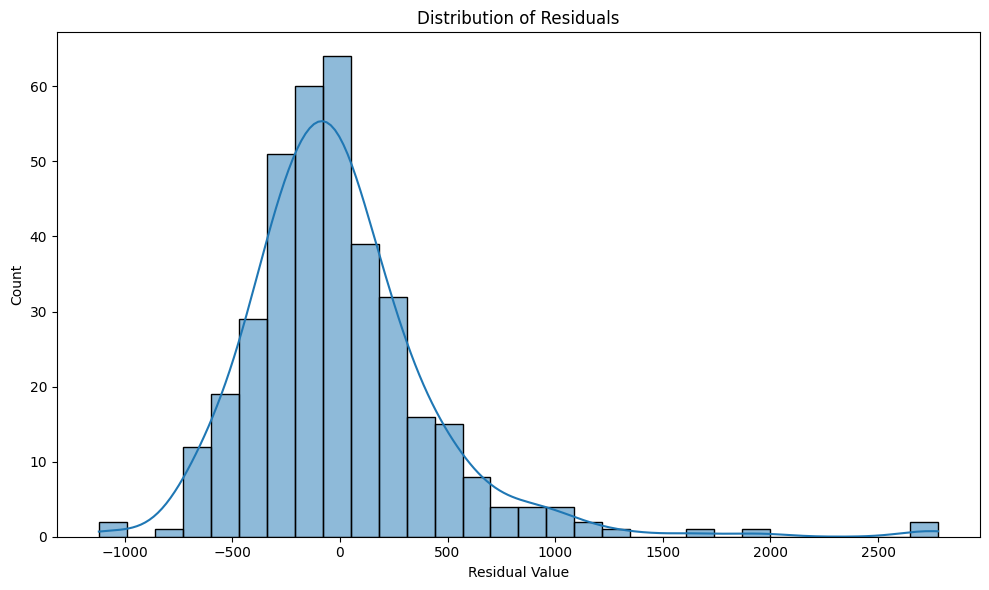

In [22]:
# Visualize Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residual Value')
plt.ylabel('Count')
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.show()

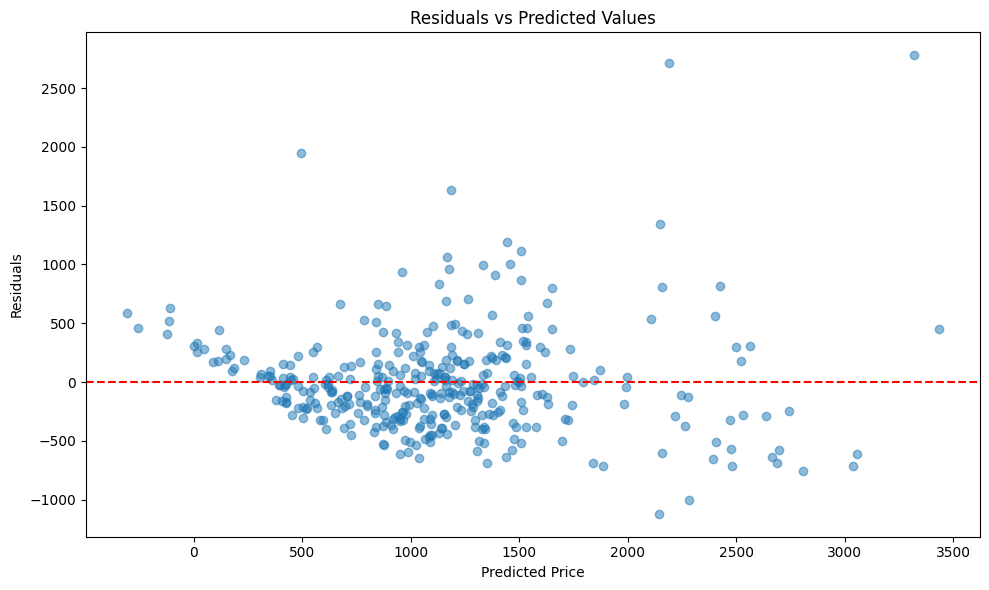

In [23]:
# Residuals vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.tight_layout()
plt.show()

In [24]:
import os
import joblib

model_path = os.path.join('..', '..', 'streamlit_app', 'models', 'best_model.joblib')

os.makedirs(os.path.dirname(model_path), exist_ok=True)

joblib.dump(model, model_path)

if os.path.exists(model_path):
    print(f"Model successfully saved to {os.path.abspath(model_path)}")
else:
    print("Error: Model could not be saved")

Model successfully saved to c:\Users\Governor\Documents\Car-Price-Prediction-model\Project_Files\streamlit_app\models\best_model.joblib
